# 제주도 관광 소비 분석

2024.01.28

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 제주도 관광 소비 분석
- 설명: ...
- 사용한 데이터셋
    - [제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객](https://www.data.go.kr/data/15046091/fileData.do): 2014~2016년도 제주도 내 내국인 관광객의 업종명, 성별, 연령대별로 카드이용금액, 카드이용건수, 건강이용금액 등 정보 제공
- 진행 절차 및 내용
    - 컬럼별 전처리, EDA
    - ...
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pickle

In [79]:
jeju_df = pd.read_csv(
    '제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv',
    encoding='cp949'
)

jeju_df

,기준년월,관광객 유형,제주 대분류,제주 중분류,업종명,성별,연령대별,카드이용금액,카드이용건수,건당이용금액,데이터기준일자
0,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433,2017-02-16
1,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986,2017-02-16
2,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598,2017-02-16
3,2014-09,내국인 관광객,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313,2017-02-16
4,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212,2017-02-16
...,...,...,...,...,...,...,...,...,...,...,...
13141,2016-08,내국인 관광객,서귀포시,남원읍,약국,남,30대,252900,43,5881,2017-02-16
13142,2016-08,내국인 관광객,서귀포시,대륜동,약국,남,20대,276100,49,5635,2017-02-16
13143,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,남,30대,610850,118,5177,2017-02-16
13144,2016-08,내국인 관광객,서귀포시,대륜동,기타음료식품,여,20대,416900,85,4905,2017-02-16


In [80]:
jeju_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   관광객 유형    13146 non-null  object
 2   제주 대분류    13146 non-null  object
 3   제주 중분류    13146 non-null  object
 4   업종명       13146 non-null  object
 5   성별        13146 non-null  object
 6   연령대별      13146 non-null  object
 7    카드이용금액   13146 non-null  int64 
 8    카드이용건수   13146 non-null  int64 
 9   건당이용금액    13146 non-null  int64 
 10  데이터기준일자   13146 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [81]:
jeju_df.isna().sum()

기준년월        0
관광객 유형      0
제주 대분류      0
제주 중분류      0
업종명         0
성별          0
연령대별        0
 카드이용금액     0
 카드이용건수     0
건당이용금액      0
데이터기준일자     0
dtype: int64

카드이용금액, 카드이용건수 컬럼에 띄어쓰기가 되어 있는 점을 발견했으므로 띄어쓰기를 제거한 새로운 컬럼명을 적용해 준다.

In [82]:
jeju_df = jeju_df.rename(columns={' 카드이용금액 ': '카드이용금액', ' 카드이용건수 ': '카드이용건수'})
jeju_df.columns

Index(['기준년월', '관광객 유형', '제주 대분류', '제주 중분류', '업종명', '성별', '연령대별', '카드이용금액',
       '카드이용건수', '건당이용금액', '데이터기준일자'],
      dtype='object')

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 컬럼별 EDA (날짜)

In [11]:
jeju_df['기준년월']

0        2014-09
1        2014-09
2        2014-09
3        2014-09
4        2014-09
          ...   
13141    2016-08
13142    2016-08
13143    2016-08
13144    2016-08
13145    2016-08
Name: 기준년월, Length: 13146, dtype: object

In [83]:
jeju_df['연도'] = jeju_df['기준년월'].str[:4]
jeju_df['월'] = jeju_df['기준년월'].str[5:]

jeju_df[['기준년월', '연도', '월']]

,기준년월,연도,월
0,2014-09,2014,09
1,2014-09,2014,09
2,2014-09,2014,09
3,2014-09,2014,09
4,2014-09,2014,09
...,...,...,...
13141,2016-08,2016,08
13142,2016-08,2016,08
13143,2016-08,2016,08
13144,2016-08,2016,08


In [39]:
jeju_df['연도'].value_counts(sort=False)

2014    2035
2015    6495
2016    4616
Name: 연도, dtype: int64

2014년부터 2016년까지의 데이터다.

In [38]:
for year in jeju_df['연도'].unique():
    print('=' * 50)
    print(f'[ {year}년 월별 ]')
    print(jeju_df[jeju_df['연도'] == year]['월'].value_counts(sort=False))
    print('=' * 50)

[ 2014년 월별 ]
09    511
10    529
11    505
12    490
Name: 월, dtype: int64
[ 2015년 월별 ]
01    507
02    498
03    525
04    531
05    550
06    550
07    566
08    587
09    557
10    553
11    537
12    534
Name: 월, dtype: int64
[ 2016년 월별 ]
01    542
02    534
03    576
04    586
05    596
06    581
07    591
08    610
Name: 월, dtype: int64


2014년 9월부터 2016년 8월까지의 데이터임에 유의해야 한다. 3년치 데이터처럼 보이지만 사실 **2년치 데이터**였다. 정확한 집계를 위해 연 컬럼을 새로 만들어 준다.

- 2014-09 ~ 2015-08: 1
- 2015-09 ~ 2016-08: 2

In [84]:
def calculate_year(date):
    year = int(date[:4])
    month = int(date[6:]) if date[5] == '0' else int(date[5:])
    
    if year == 2014:
        return 1
    elif year == 2015 and month <= 8:
        return 1
    else:
        return 2

jeju_df['yearly'] = jeju_df['기준년월'].apply(calculate_year)
jeju_df[['기준년월', 'yearly']].value_counts(sort=False).to_frame()

,,0
기준년월,yearly,
2014-09,1,511
2014-10,1,529
2014-11,1,505
2014-12,1,490
2015-01,1,507
2015-02,1,498
2015-03,1,525
2015-04,1,531
2015-05,1,550


In [53]:
yearly_df = jeju_df.groupby('yearly').agg({'카드이용금액': 'sum', '카드이용건수': 'sum'})
yearly_df

,카드이용금액,카드이용건수
yearly,,
1,22088283921,796906
2,26514897353,955562


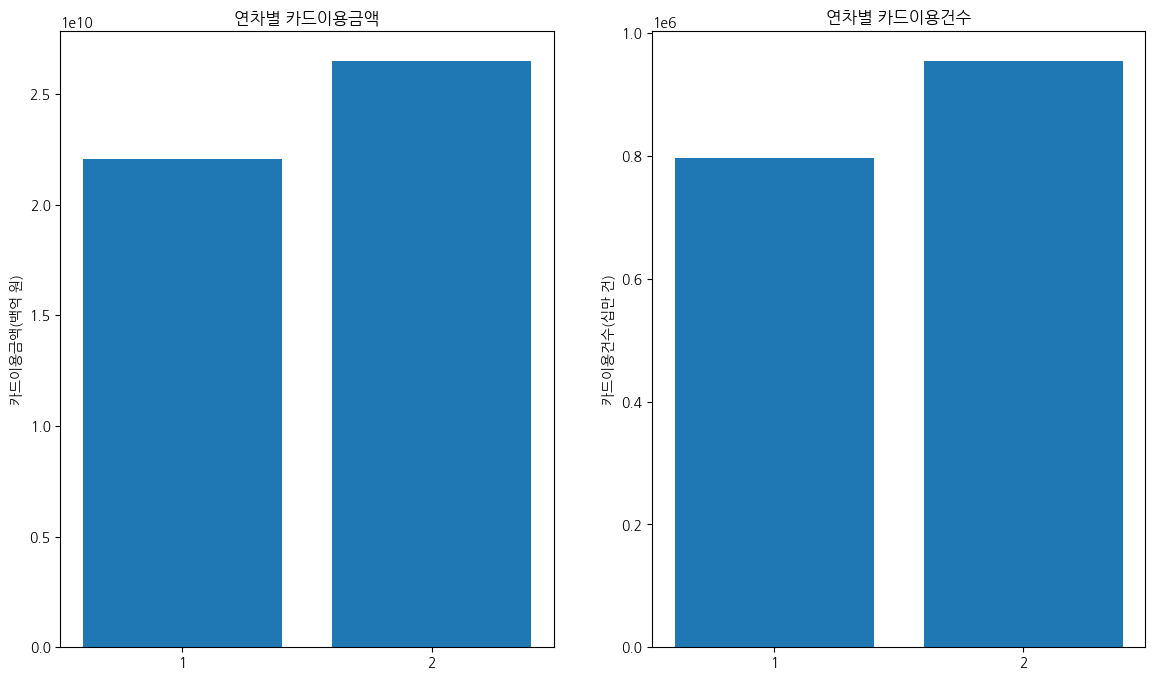

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 8))

axes[0].bar(
    yearly_df.index,
    yearly_df['카드이용금액']
)
axes[0].set_xticks(yearly_df.index)
axes[0].set_ylabel('카드이용금액(백억 원)')
axes[0].set_title('연차별 카드이용금액')

axes[1].bar(
    yearly_df.index,
    yearly_df['카드이용건수']
)
axes[1].set_xticks(yearly_df.index)
axes[1].set_ylabel('카드이용건수(십만 건)')
axes[1].set_title('연차별 카드이용건수')

plt.show()

2015년 9월 ~ 2016년 8월 기간의 실적이 더 높다.

한편, 관광 데이터는 계절 단위로 끊어서 보는 게 좋겠다는 생각이 들었다.

In [85]:
def generate_season(date):
    month = int(date[6:]) if date[5] == '0' else int(date[5:])
    if 3 <= month <= 5:
        return 1
    elif 6 <= month <= 8:
        return 2
    elif 9 <= month <= 11:
        return 3
    else:
        return 4

jeju_df['계절'] = jeju_df['기준년월'].apply(generate_season)
jeju_df[['기준년월', '계절']].value_counts(sort=False).to_frame()

,,0
기준년월,계절,
2014-09,3,511
2014-10,3,529
2014-11,3,505
2014-12,4,490
2015-01,4,507
2015-02,4,498
2015-03,1,525
2015-04,1,531
2015-05,1,550


In [72]:
seasonal_df = jeju_df.groupby('계절').agg({'카드이용금액': 'sum', '카드이용건수': 'sum'})
seasonal_df

,카드이용금액,카드이용건수
계절,,
1,12888857680,439031
2,13926926407,550636
3,11734785067,398419
4,10052612120,364382


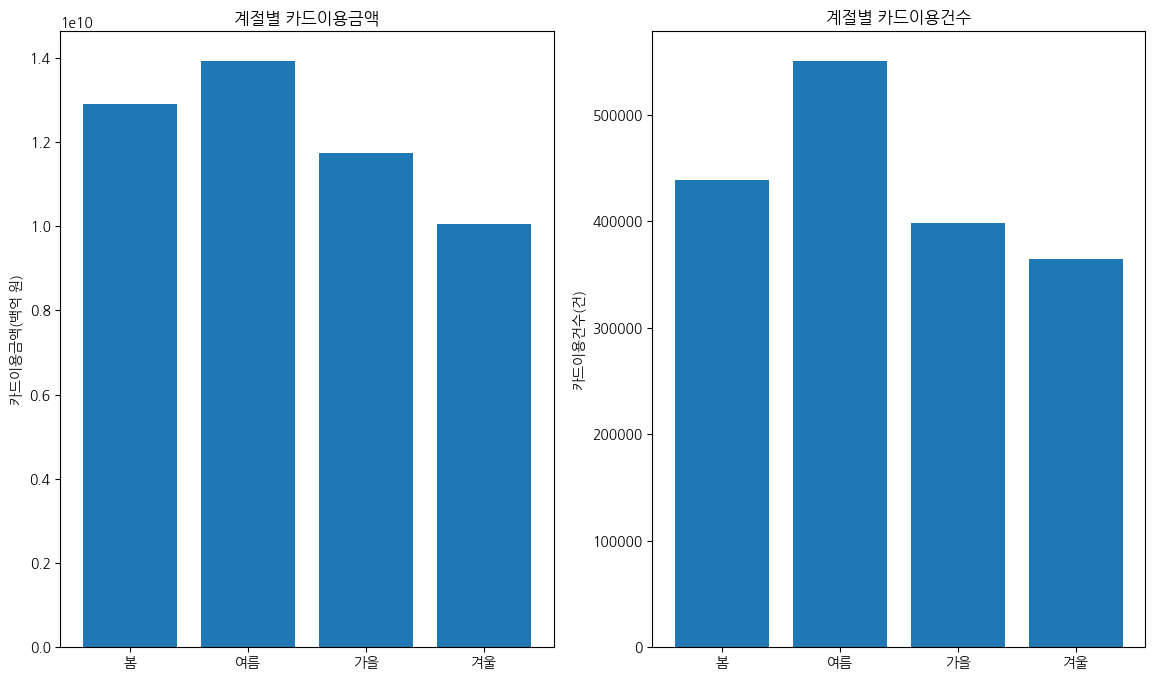

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 8))

axes[0].bar(
    seasonal_df.index.map({1: '봄', 2: '여름', 3: '가을', 4: '겨울'}),
    seasonal_df['카드이용금액']
)
axes[0].set_ylabel('카드이용금액(백억 원)')
axes[0].set_title('계절별 카드이용금액')

axes[1].bar(
    seasonal_df.index.map({1: '봄', 2: '여름', 3: '가을', 4: '겨울'}),
    seasonal_df['카드이용건수']
)
axes[1].set_ylabel('카드이용건수(건)')
axes[1].set_title('계절별 카드이용건수')

plt.show()

여름의 카드이용금액과 카드이용건수가 가장 많고, **여름 > 봄 > 가을 > 겨울**의 추이를 보인다. 다만 이 지점에서, 건당 이용금액에는 다소 차이를 보일 수도 있겠다는 생각이 들었다. 추후 분석 시에 이 부분을 확인해 보면 좋을 듯하다.

#### 2-2-2. 컬럼별 EDA (이용자 관련)

이용자 관련 컬럼으로는 다음의 3가지가 있다.
- 관광객 유형
- 성별
- 연령대별

In [87]:
jeju_df['관광객 유형'].value_counts()

내국인 관광객    13146
Name: 관광객 유형, dtype: int64

외국인 관광객은 없고 내국인 관광객만 있다. 그럼 이 컬럼이 왜 필요해?

In [89]:
jeju_df['성별'].value_counts()

남    6609
여    6537
Name: 성별, dtype: int64

In [90]:
gender_df = jeju_df.groupby('성별').agg({'카드이용금액': 'sum', '카드이용건수': 'sum'})
gender_df

,카드이용금액,카드이용건수
성별,,
남,25714910191,928305
여,22888271083,824163


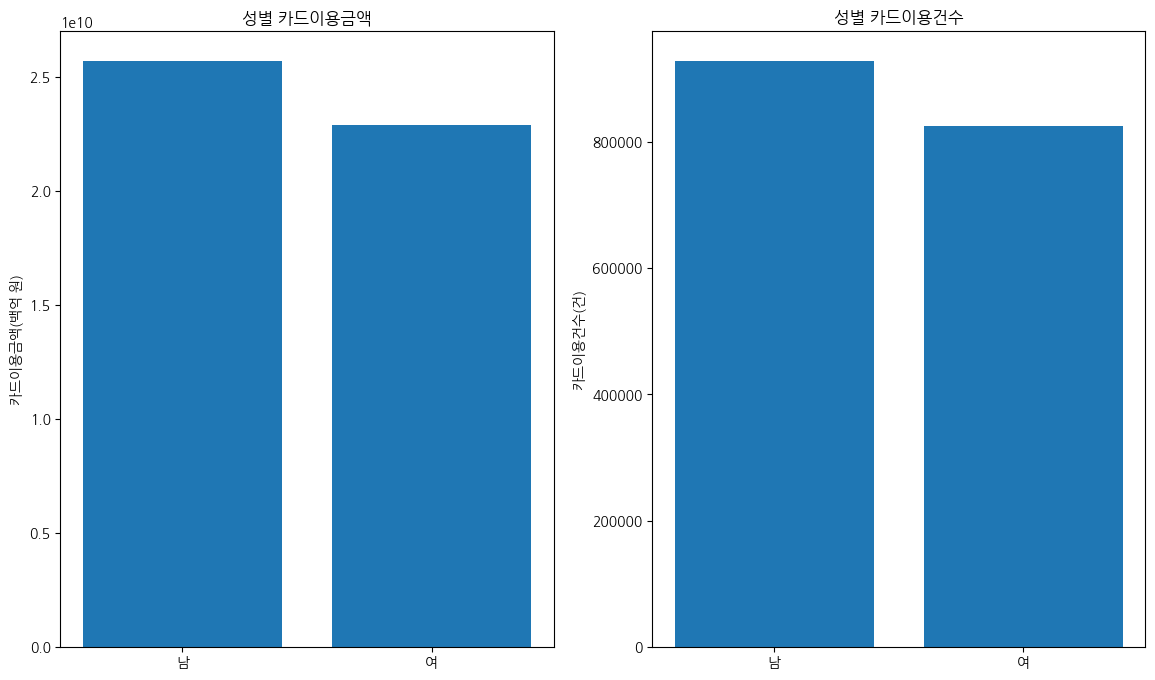

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 8))

axes[0].bar(
    gender_df.index,
    gender_df['카드이용금액']
)
axes[0].set_ylabel('카드이용금액(백억 원)')
axes[0].set_title('성별 카드이용금액')

axes[1].bar(
    gender_df.index,
    gender_df['카드이용건수']
)
axes[1].set_ylabel('카드이용건수(건)')
axes[1].set_title('성별 카드이용건수')

plt.show()

**남성**의 카드이용금액과 카드이용건수가 더 높은 점을 확인할 수 있다.

In [93]:
jeju_df['연령대별'].value_counts(sort=False)

50대    3016
40대    3428
30대    3565
20대    3137
Name: 연령대별, dtype: int64

20대부터 50대까지의 데이터로 구성되어 있다.

In [95]:
age_df = jeju_df.groupby('연령대별').agg({'카드이용금액': 'sum', '카드이용건수': 'sum'})
age_df

,카드이용금액,카드이용건수
연령대별,,
20대,7399961053,370833
30대,14856286866,595447
40대,14370117286,470852
50대,11976816069,315336


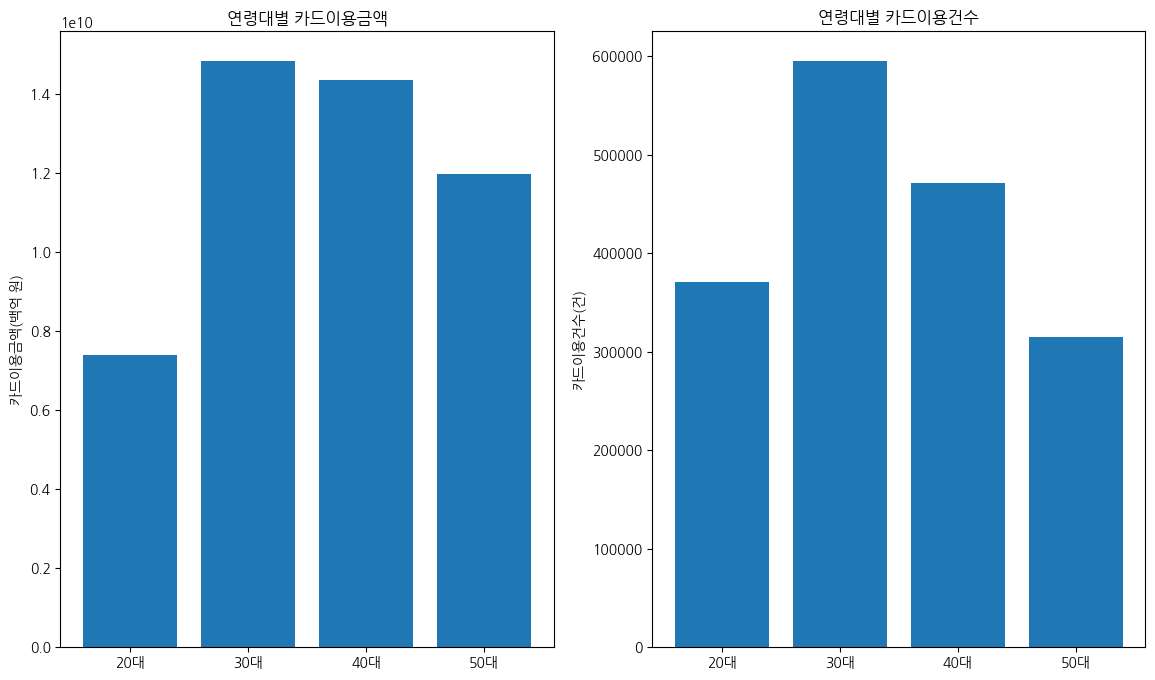

In [96]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 8))

axes[0].bar(
    age_df.index,
    age_df['카드이용금액']
)
axes[0].set_ylabel('카드이용금액(백억 원)')
axes[0].set_title('연령대별 카드이용금액')

axes[1].bar(
    age_df.index,
    age_df['카드이용건수']
)
axes[1].set_ylabel('카드이용건수(건)')
axes[1].set_title('연령대별 카드이용건수')

plt.show()

연령대별로는 **30대**가 가장 높은 카드이용금액, 카드이용건수 분포를 보인다.

여기서 흥미로운 점은 카드이용금액에서 가장 낮은 연령대는 20대이지만, 카드이용건수에서 가장 낮은 연령대는 50대라는 점이다. 카드이용건수 대비 카드이용금액을 볼 때 40대와 50대가 유독 많은 금액을 이용했다. 즉 건당 금액을 산출해 보면 4050의 지표가 높을 것으로 예상된다. 이러한 부분도 추후 분석에 있어서 참고하면 좋을 듯하다.

#### 2-2-3. 컬럼별 EDA (관광지 관련)

관광지 관련 컬럼으로는 다음의 3가지가 있다.
- 제주 대분류
- 제주 중분류
- 업종명

In [98]:
jeju_df['제주 대분류'].value_counts()

제주시     8729
서귀포시    4417
Name: 제주 대분류, dtype: int64

In [99]:
city_df = jeju_df.groupby('제주 대분류').agg({'카드이용금액': 'sum', '카드이용건수': 'sum'})
city_df

,카드이용금액,카드이용건수
제주 대분류,,
서귀포시,11216064345,402729
제주시,37387116929,1349739


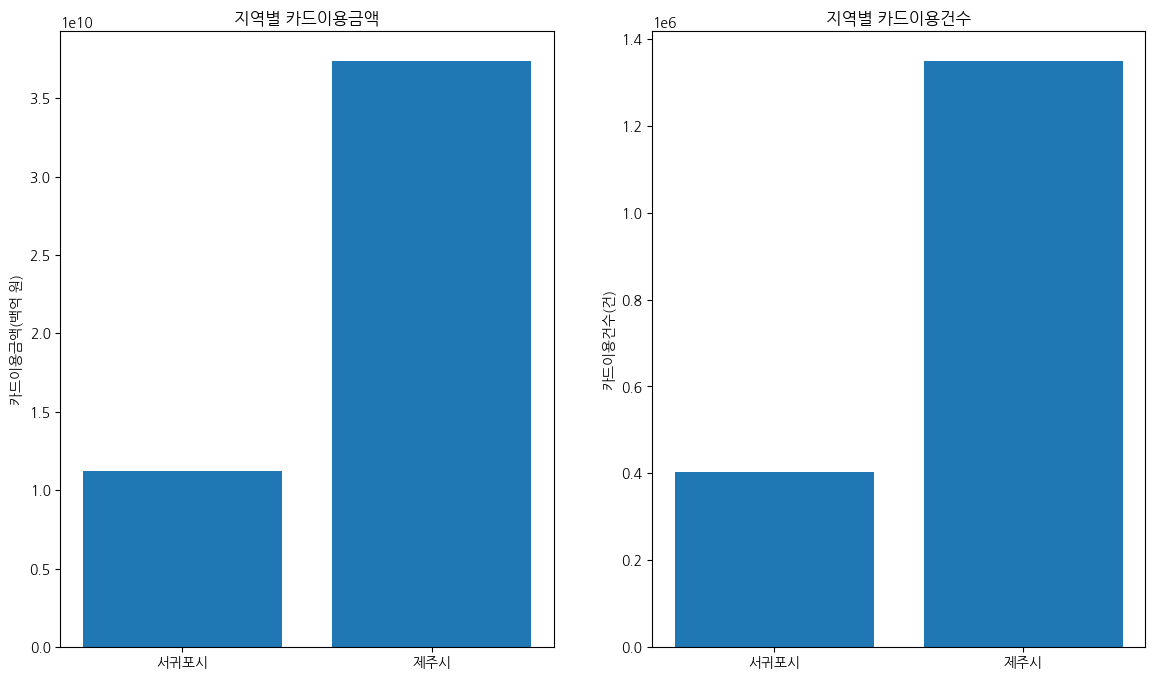

In [100]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 8))

axes[0].bar(
    city_df.index,
    city_df['카드이용금액']
)
axes[0].set_ylabel('카드이용금액(백억 원)')
axes[0].set_title('지역별 카드이용금액')

axes[1].bar(
    city_df.index,
    city_df['카드이용건수']
)
axes[1].set_ylabel('카드이용건수(건)')
axes[1].set_title('지역별 카드이용건수')

plt.show()

서귀포보단 제주시에서의 실적이 훨씬 높다.

중분류의 경우엔 내가 제주도의 행정구역을 잘 모르기 때문에 확인해봤자 딱히 의미가 없을 것 같으니 패스한다.

In [106]:
jeju_df['업종명'].value_counts()

슈퍼 마켓      1911
농축수산품      1884
스넥         1734
약국         1606
기타음료식품     1484
의원         1073
기념품 점      1017
스포츠레져용품     840
정장(여성)      673
악세 사리       403
안경          384
신   발        95
골프 용품        39
귀 금 속         3
Name: 업종명, dtype: int64

In [107]:
category_df = jeju_df.groupby('업종명').agg({'카드이용금액': 'sum', '카드이용건수': 'sum'})
category_df

,카드이용금액,카드이용건수
업종명,,
골프 용품,37213800,509
귀 금 속,2180100,39
기념품 점,7864854995,269606
기타음료식품,1338100496,74605
농축수산품,13092560386,201118
슈퍼 마켓,11690570213,566853
스넥,5461163557,361896
스포츠레져용품,3413438318,39493
신 발,77235600,1353


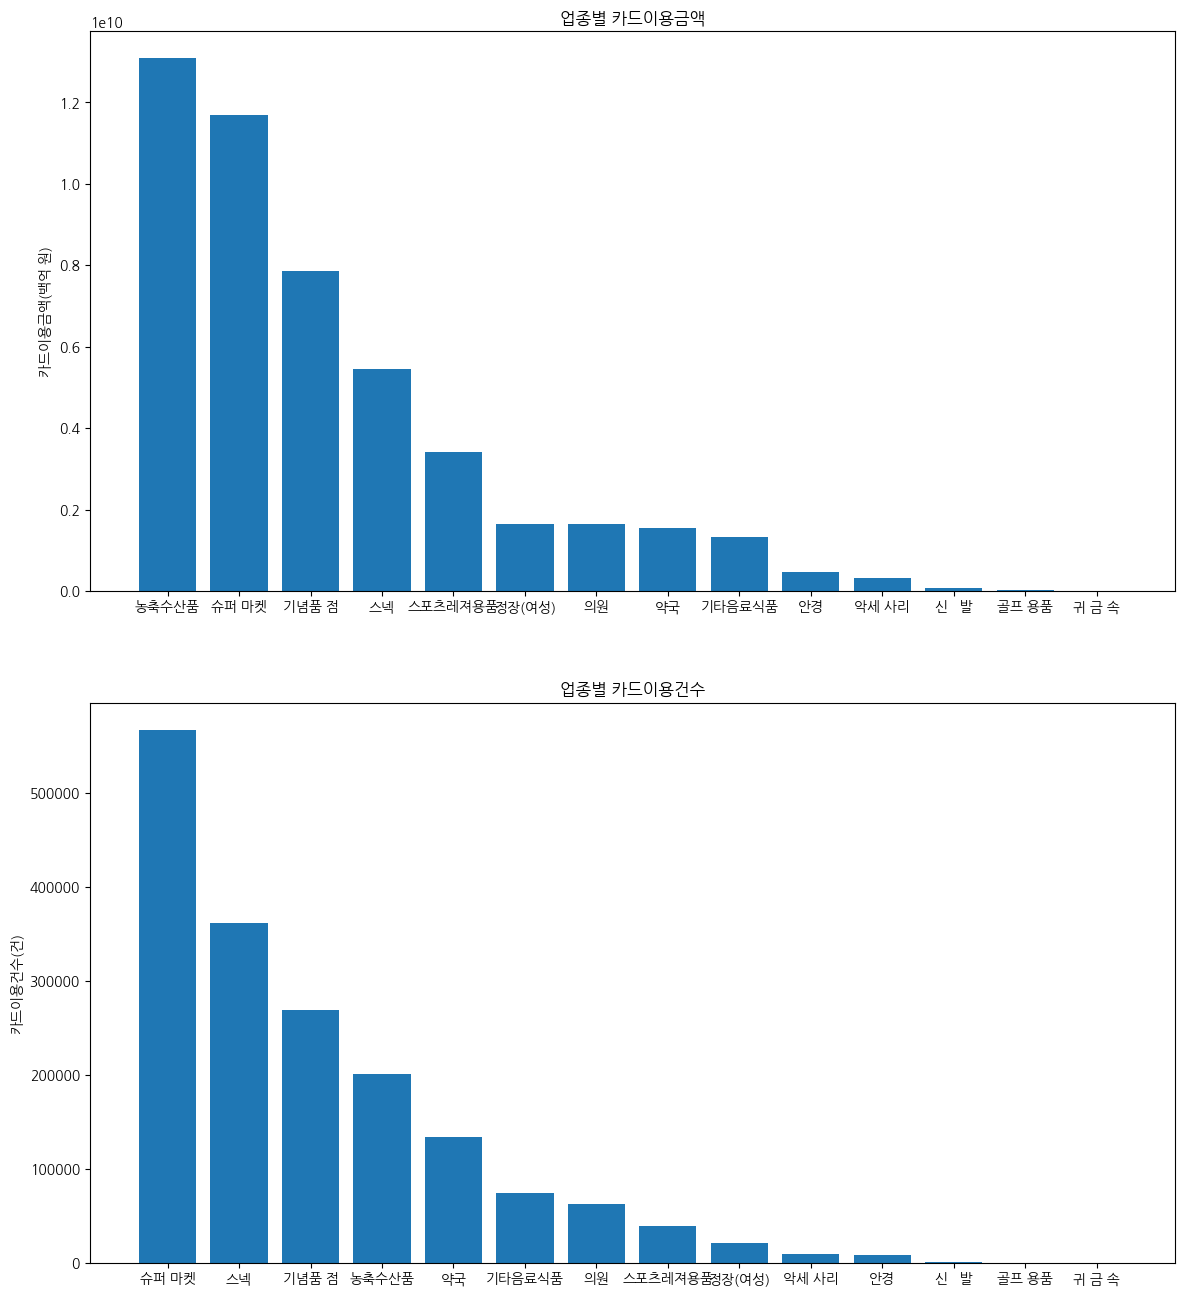

In [112]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 16))

axes[0].bar(
    category_df.sort_values('카드이용금액', ascending=False).index,
    category_df.sort_values('카드이용금액', ascending=False)['카드이용금액']
)
axes[0].set_ylabel('카드이용금액(백억 원)')
axes[0].set_title('업종별 카드이용금액')

axes[1].bar(
    category_df.sort_values('카드이용건수', ascending=False).index,
    category_df.sort_values('카드이용건수', ascending=False)['카드이용건수']
)
axes[1].set_ylabel('카드이용건수(건)')
axes[1].set_title('업종별 카드이용건수')

plt.show()

카드이용금액은 **농축수산품**이 가장 높지만, 카드이용건수는 **슈퍼 마켓**이 가장 높다.

업종별로 건수 대비 금액의 편차가 꽤 클 것으로 예상되는 만큼, 이를 이용한 분석이 꽤 흥미로울 것으로 보인다.

#### 2-2-4. 컬럼별 EDA (실적 관련)

실적 관련 컬럼으로는 다음의 3가지가 있다.
- 카드이용건수
- 카드이용금액
- 건당이용금액

In [113]:
numerics = ['카드이용건수', '카드이용금액', '건당이용금액']
jeju_df[numerics].describe()

,카드이용건수,카드이용금액,건당이용금액
count,13146.000000,1.314600e+04,13146.000000
mean,133.308079,3.697184e+06,35163.811273
std,210.459082,6.232327e+06,35421.702281
min,10.000000,3.610000e+04,3520.000000
25%,23.000000,5.958600e+05,13939.250000
50%,54.000000,1.533550e+06,21007.500000
75%,143.000000,3.863175e+06,46235.750000
max,2574.000000,6.427770e+07,539047.000000


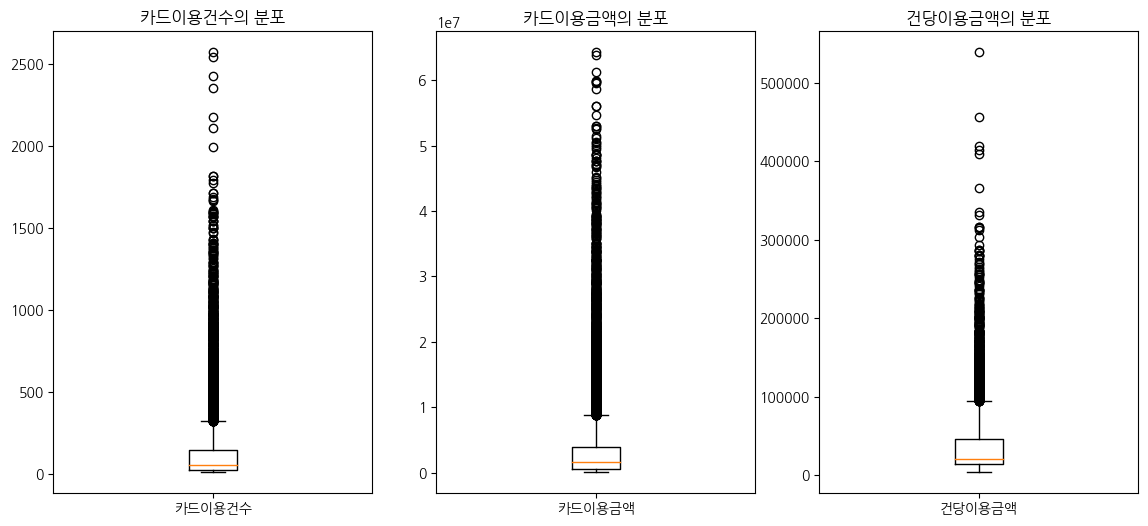

In [122]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 6))

for i in range(len(numerics)):
    axes[i].boxplot(jeju_df[numerics[i]], labels=[numerics[i]])
    axes[i].set_title(f'{numerics[i]}의 분포')

사실 이렇게 보는 건 큰 의미가 없다. 왜냐하면 데이터 자체가 이미 한 차례 특정 기준으로 집계된 데이터기 때문이다. 특히 건당이용금액 컬럼의 경우 매 분석마다 카드이용건수, 카드이용금액 컬럼을 이용하여 새롭게 산출하는 것이 바람직하겠다.

In [124]:
# pickle로 저장
with open('jeju_df.pkl', 'wb') as file:
    pickle.dump(jeju_df, file)

---

## 3. 데이터 분석

### 3-1. 문제 정의

제주 관광당국의 입장에서, 어떤 요인을 정책적으로 푸시해줘야 바람직할지 분석
- 인구통계학적 세그먼트(연령, 성별)
- 계절별(월별) 요인
- 업종별 실적

이 3가지 요인을 각각 통계적으로 분석하여 가장 높은 실적이 기대되는 액션 아이템 도출

### 3-2. 데이터 분석

In [ ]:
# 가설 검정, 머신러닝, ...

### 3-3. 결과 해석

내용

---

## 4. 후기

내용